In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
%matplotlib inline

# Q1: สรุปข้อมูล (Data Summary)

a) โหลดชุดข้อมูล Titanic

In [ ]:
df = pd.read_csv("titanic_data.csv")

b) แสดงบางส่วนของข้อมูล

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


c) แต่ละคอลัมน์มีประเภทข้อมูล (data types) เป็นอะไรบ้าง?

In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Q2: สถิติเชิงพรรณนา (Descriptive Statistics)

a) คำนวณและอธิบายค่าเฉลี่ย (mean), ค่ามัธยฐาน (median), ค่าโหมด (mode), ค่าส่วนเบี่ยงเบนมาตรฐาน (standard deviation), และช่วงควอไทล์ (interquartile range, IQR) สำหรับคอลัมน์ที่เป็นตัวเลข?

จากคอลัมน์ที่เป็นตัวเลขทั้งหมดได้แก่ PassengerId, Survived, Pclass, Age, SibSp, Parch และ Fare เมื่อพิจารณา PassengerId จะไม่สามารถนำมาคำนวณ Descriptive statistics ได้
เนื่องจากเป็นค่าที่ชี้เฉพาะเจาะจงแถวนั้นๆ (Primary keys) เช่นเดียวกับ Survived และ Pclass ที่ถึงแม้จะข้อมูลที่เป็นตัวเลข แต่ก็เป็นข้อมูลแบบ Categorical data จึงไม่สามารถนำมาคำนวณได้เช่นกัน

In [ ]:
# num_columns = ["PassengerId", "Survived", "Pclass", "Age", "SibSp", "Parch", "Fare"]
num_columns = ["Age", "SibSp", "Parch", "Fare"]
num_df = df[num_columns]

In [ ]:
num_df.mean()

Age      29.699118
SibSp     0.523008
Parch     0.381594
Fare     32.204208
dtype: float64

In [ ]:
num_df.median()

Age      28.0000
SibSp     0.0000
Parch     0.0000
Fare     14.4542
dtype: float64

In [ ]:
num_df.mode().loc[0]

Age      24.00
SibSp     0.00
Parch     0.00
Fare      8.05
Name: 0, dtype: float64

จากค่าส่วนเบี่ยงเบนมาตรฐานจะพบว่า Fare มีการกระจายของข้อมูลมากที่สุด ส่วน Parch มีการกระจายตัวของข้อมูลน้อยที่สุด

In [ ]:
num_df.std()

Age      14.526497
SibSp     1.102743
Parch     0.806057
Fare     49.693429
dtype: float64

IQR เป็นอีกหนึ่งวิธีที่ใช้ในการหาการกระจายของข้อมูล โดยจะได้รับผลกระทบจากค่า Outliers น้อยกว่าส่วนเบี่ยงเบนมาตรฐาน อีกทั้งยังนำไปคำนวณหาค่า Outliers ต่อได้

In [ ]:
num_df.quantile(0.75) - num_df.quantile(0.25)

Age      17.8750
SibSp     1.0000
Parch     0.0000
Fare     23.0896
dtype: float64

b) คำนวณค่าส่วนเบี่ยงเบน (skewness) สำหรับคอลัมน์ที่เป็นตัวเลข ค่าดังกล่าวบอกอะไรเกี่ยวกับการกระจายตัว (distribution) ของตัวแปรแต่ละตัว?

ค่าส่วนเบี่ยงเบนเมื่อพิจารณาจะแบ่งออกได้เป็น 3 กรณี


1.   มีค่าเป็นศูนย์ (หรือใกล้เคียงศูนย์): ข้อมูลมีการกระจายตัวแบบสมมาตร
2.   มีค่าเป็นบวก: ข้อมูลมีการกระจายตัวแบบเบ้ขวา (Right-skewed)
3.   มีค่าเป็นลบ: ข้อมูลมีการกระจายตัวแบบเบ้ซ้าย (Left-skewed)

โดยยิ่งมีค่าที่เป็นบวกหรือลบมากเท่าใด ก็จะยิ่งเบ้ขวาหรือซ้ายมากขึ้นเท่านั้น
<br><br>
ดังนั้นจะได้ว่าคอลัมน์ Age มีค่าส่วนเบี่ยงเบนที่ใกล้เคียงศูนย์ จึงสามารถอนุมานได้ว่ามีการกระจายตัวใกล้เคียงกับการแจกแจงปกติ ส่วน SibSp, Parch
และ Fare ที่มีค่าส่วนเบี่ยงเบนเป็นบวกค่อนข้างมาก จะมีการกระจายตัวแบบเบ้ขวา



In [ ]:
num_df.skew()

Age      0.389108
SibSp    3.695352
Parch    2.749117
Fare     4.787317
dtype: float64

c) สรุปการกระจายตัวของแต่ละคอลัมน์ที่่เป็นประเภทเชิงพรรณนา (categorical columns) ในชุดข้อมูล?

จากคอลัมน์ที่เป็น Categorical data ทั้งหมด ได้แก่ PassengerId, Survived, Pclass, Name, Sex, Ticket, Cabin และ Embarked จะพบว่าไม่สามารถนำ PassengerId, Name และ Ticket มาคำนวณได้ เนื่องจากเป็น Attribute ที่ชี้เฉพาะเจาะจงแถวของข้อมูล ทั้ง 3 คอลัมน์

In [ ]:
# cat_df = ["PassengerId", "Survived", "Pclass", "Name", "Sex", "Ticket", "Cabin", "Embarked"]
cat_df = ["Survived", "Pclass", "Sex", "Cabin", "Embarked"]

จาก Count plot พบว่ามีผู้เสียชีวิตมากกว่าผู้รอดชีวิตพอสมควร

<Axes: title={'center': 'Count Plot of Survived'}, xlabel='Survived', ylabel='Frequency'>

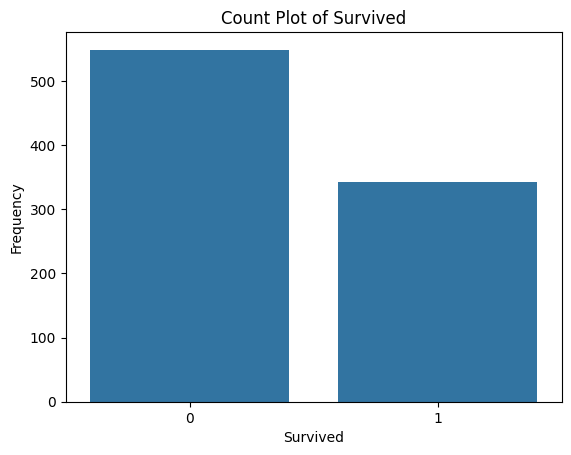

In [ ]:
plt.ylabel("Frequency")
plt.title("Count Plot of Survived")
sns.countplot(data=df, x="Survived")

จาก Count plot พบว่ามีผู้โดยสารใน Third class มากที่สุดอย่างเห็นได้ชัด ส่วน First class และ Second class มีจำนวนที่ใกล้เคียงกัน

<Axes: title={'center': 'Count Plot of Pclass'}, xlabel='Pclass', ylabel='Frequency'>

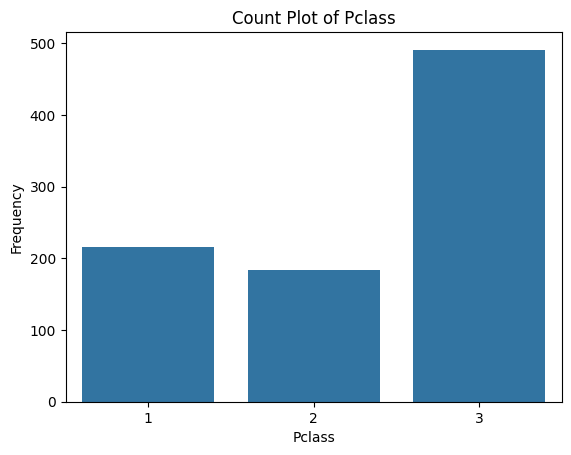

In [ ]:
plt.ylabel("Frequency")
plt.title("Count Plot of Pclass")
sns.countplot(data=df, x="Pclass")

จาก Count plot พบว่ามีผู้โดยสารเพศชายมากกว่าเพศหญิงเกือบเท่าตัว

<Axes: title={'center': 'Count Plot of Sex'}, xlabel='Sex', ylabel='Frequency'>

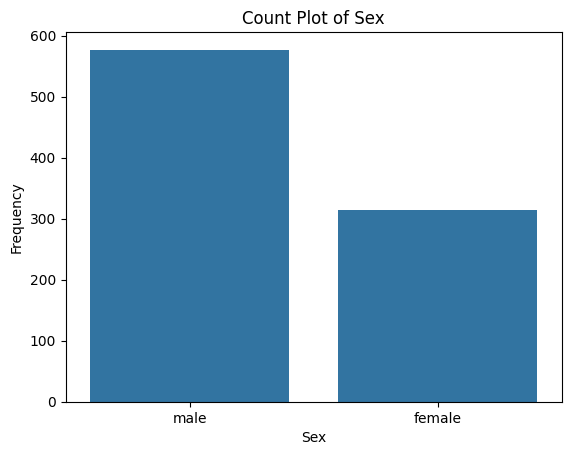

In [ ]:
plt.ylabel("Frequency")
plt.title("Count Plot of Sex")
sns.countplot(data=df, x="Sex")

จาก Count plot พบว่าในห้องโดยสารมีผู้โดยสารต่อห้องมากที่สุดที่ 4 คน แต่ส่วนใหญ่จะมีผู้โดยสารเพียง 1 คนต่อห้อง

<Axes: title={'center': 'Count Plot of Cabin'}, xlabel='Cabin', ylabel='Frequency'>

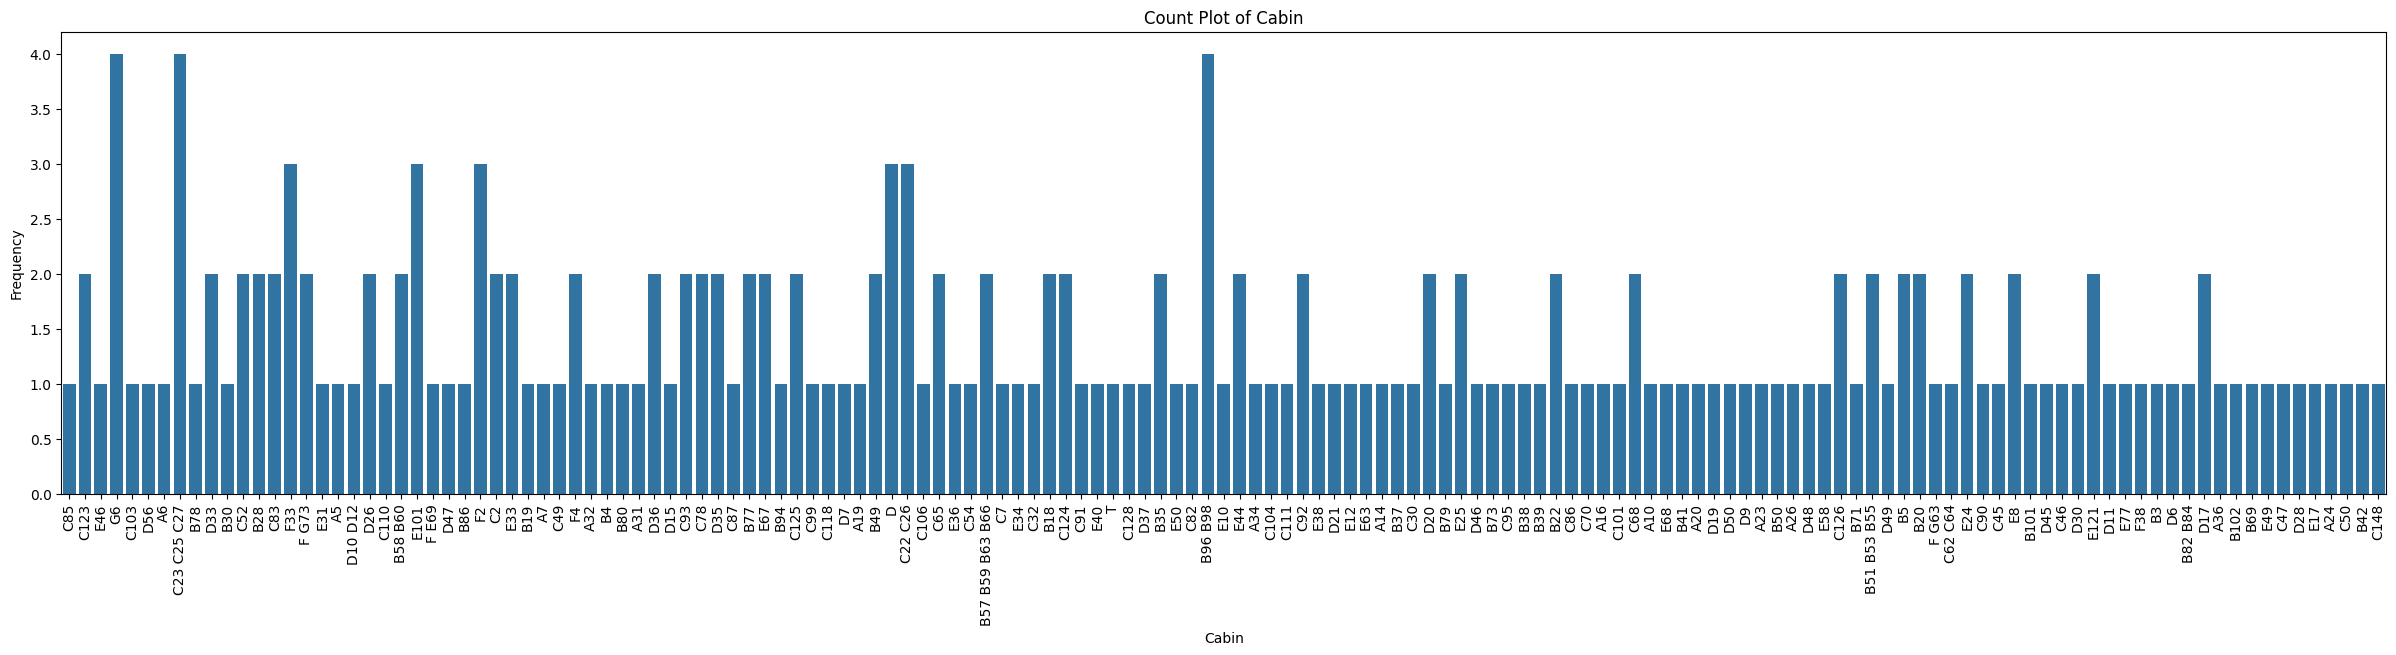

In [ ]:
plt.figure(figsize=(30, 6))
plt.xticks(rotation=90)
plt.ylabel("Frequency")
plt.title("Count Plot of Cabin")
sns.countplot(data=df, x="Cabin")

ตัวย่อของค่าต่างๆ ของคอลัมน์ Embarked มีความหมายดังนี้

*   S: Southampton
*   C: Cherbourg
*   Q: Queenstown

จาก Count plot พบว่ามีการรับผู้โดยสารที่ท่าเรือ Southamapton มากที่สุดอย่างเห็นได้ชัด ซึ่งก็สมเหตุสมผล เนื่องจากเรือไททานิคเริ่มออกเดินทางที่ท่าเรือ Southampton รองลงมาเป็นท่าเรือ Cherbourg และท่าเรือที่รับผู้โดยสารน้อยที่สุดคือท่าเรือ Queenstown

<Axes: title={'center': 'Count Plot of Embarked'}, xlabel='Embarked', ylabel='Frequency'>

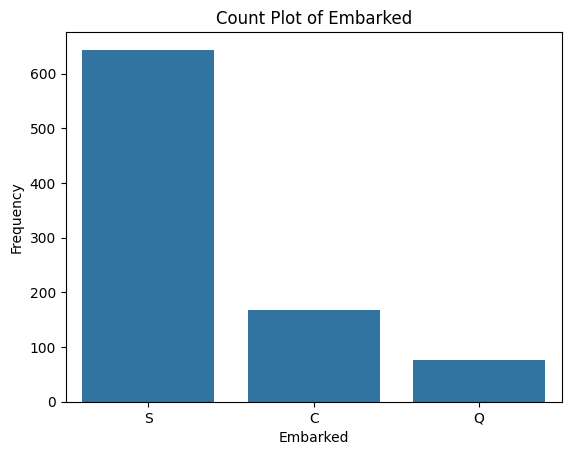

In [ ]:
plt.ylabel("Frequency")
plt.title("Count Plot of Embarked")
sns.countplot(data=df, x="Embarked")

# Q3: การตรวจหาข้อมูลที่ขาดหาย และผิดปกติ (Missing Data, Outliers)

a) ตรวจสอบว่ามีค่าที่ขาดหาย (missing values) ในชุดข้อมูลหรือไม่ คอลัมน์ใดบ้างที่มีค่าที่ขาดหาย?

เมื่อทำการตรวจสอบข้อมูล พบว่ามีคอลัมน์ Age, Cabin และ Embarked ที่มี Missing values

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

b) แสดงภาพข้อมูลที่ขาดหายโดยใช้ heatmap จาก heatmap เราสามารถสรุปอะไรได้บ้าง?

จาก Heatmap จะสังเกตได้ว่ามี 3 คอลัมน์ที่มี Missing values ได้แก่ Age, Cabin และ Embarked โดยคอลัมน์ที่มี Missing values เยอะที่สุดคือ Cabin รองลงมาคือ Age และคอลัมน์ที่มี Missing values น้อยที่สุดคือ Embarked

<Axes: >

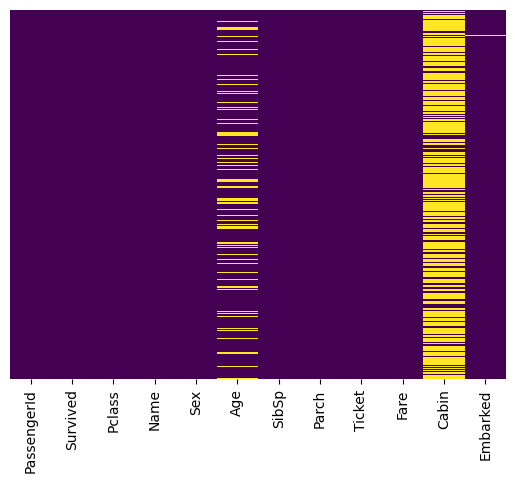

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

c) จงยกตัวอย่างสองถึงสามตัวแปรที่มีค่าผิดปกติ (outliers) และอธิบายว่าคุณตรวจพบค่าผิดปกติเหล่านี้ได้อย่างไร

ใช้ Boxplot ในการตรวจสอบหา Outliers โดยหากมีค่าที่อยู่นอกหนวดแมวแสดงว่าคอลัมน์นั้นมีค่า Outliers
ซึ่งหลังทำการตรวจสอบพบว่าคอลัมน์ Age, SibSp และ Fare มีค่า Outliers

Text(0.5, 1.0, 'Box plot of Age')

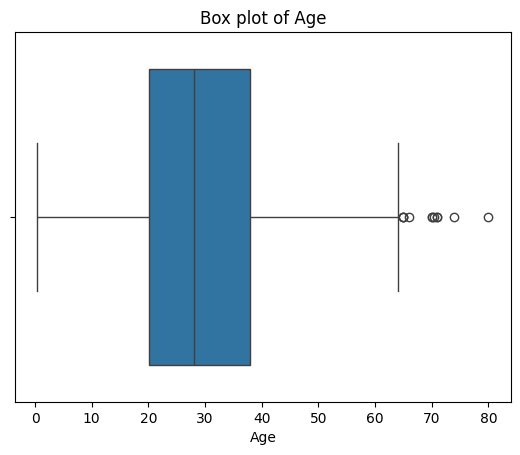

In [ ]:
sns.boxplot(data=df, x="Age")
plt.title("Box plot of Age")

Text(0.5, 1.0, 'Box plot of SibSp')

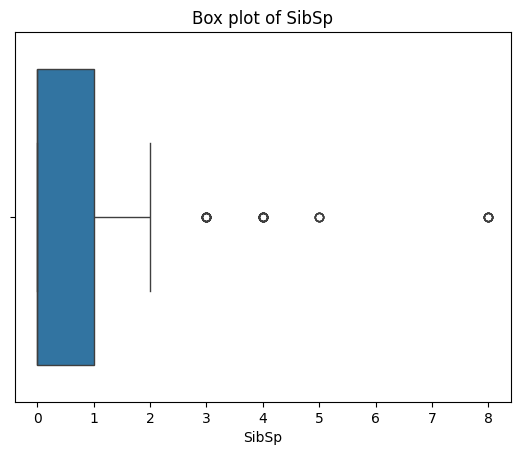

In [ ]:
sns.boxplot(data=df, x="SibSp")
plt.title("Box plot of SibSp")

Text(0.5, 1.0, 'Box plot of Fare')

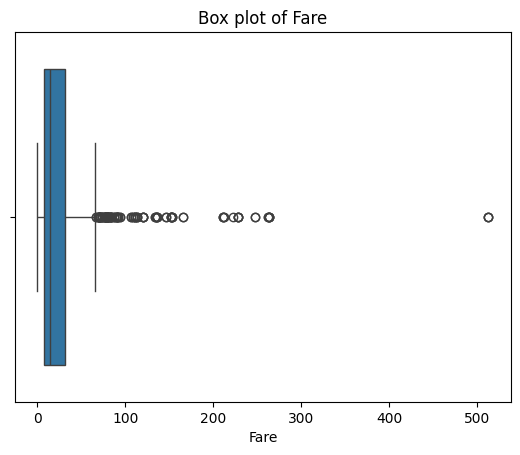

In [ ]:
sns.boxplot(data=df, x="Fare")
plt.title("Box plot of Fare")

# Q4: การแสดงข้อมูลด้วยกราฟ (Data Visualization)

a) สร้างฮิสโตแกรม (histograms) สำหรับคอลัมน์อายุ (Age) และค่าโดยสาร (Fare) กราฟฮิสโตแกรมบอกอะไรเกี่ยวกับการกระจายตัวของตัวแปรเหล่านี้บาง?

จาก Histogram พบว่าอายุของผู้โดยสารส่วนใหญ่อยู่ระหว่างช่วง 20-40 ปี โดยมีการกระจายตัวที่ใกล้เคียงกับการแจกแจงปกติ

Text(0, 0.5, 'Frequency')

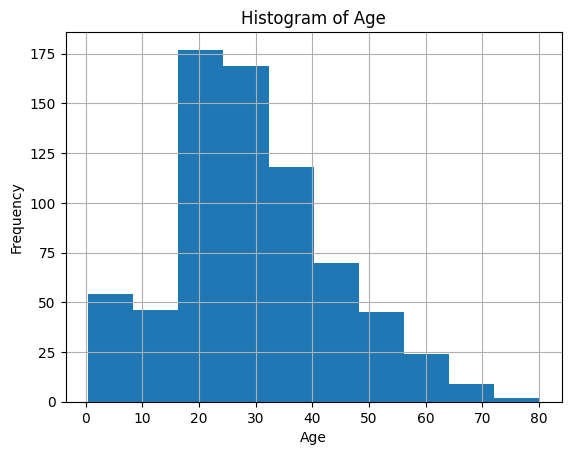

In [ ]:
column = "Age"
df[column].hist()
plt.title(f"Histogram of {column}")
plt.xlabel(column)
plt.ylabel("Frequency")

จาก Histogram พบว่าค่าโดยสารส่วนใหญ่ไม่เกิน 50 ปอนด์ และมีการกระจายตัวของค่าโดยสารแบบเบ้ขวาค่อนข้างมาก

Text(0, 0.5, 'Frequency')

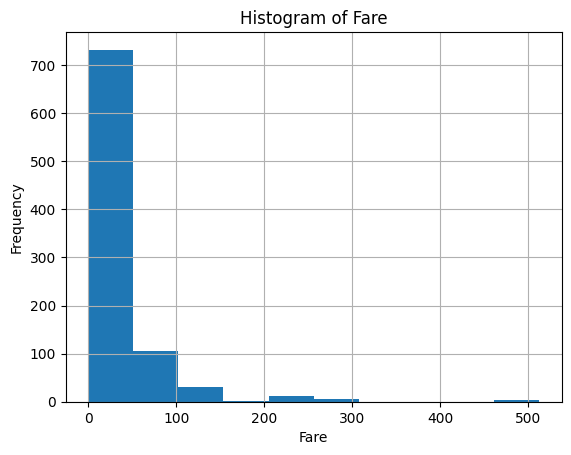

In [ ]:
column = "Fare"
df[column].hist()
plt.title(f"Histogram of {column}")
plt.xlabel(column)
plt.ylabel("Frequency")

b) สร้างกล่องกราฟ (box plots) สำหรับคอลัมน์อายุ (Age), ค่าโดยสาร (Fare), และจำนวนพี่น้อง/คู่สมรส (SibSp) กราฟกล่องบอกอะไรเกี่ยวกับการกระจายตัวและค่าผิดปกติ (outliers) ของตัวแปรเหล่านี้บ้าง?

จาก Box plot พบว่าส่วนใหญ่ผู้โดยสารมีอายุอยู่ในช่วงประมาณ 20-40 ปี ส่วนค่า Outliers จะเป็นผู้สูงวัยที่มีอายุประมาณ 65 ปีขึ้นไป

Text(0.5, 1.0, 'Box Plot of Age')

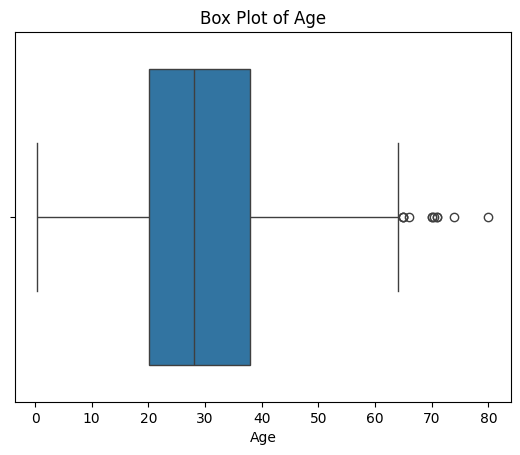

In [ ]:
sns.boxplot(data=df, x="Age")
plt.title("Box Plot of Age")

จาก Box plot พบว่าส่วนใหญ่ผู้โดยสารจะมีจำนวนพี่น้อง/คู่สมรสอยู่ระหว่าง 0-1 คน โดย Outliers จะเป็นผู้โดยสารที่มีจำนวนพี่น้อง/คู่สมรสตั้งแต่ 3 คนขึ้นไป


Text(0.5, 1.0, 'Box Plot of SibSp')

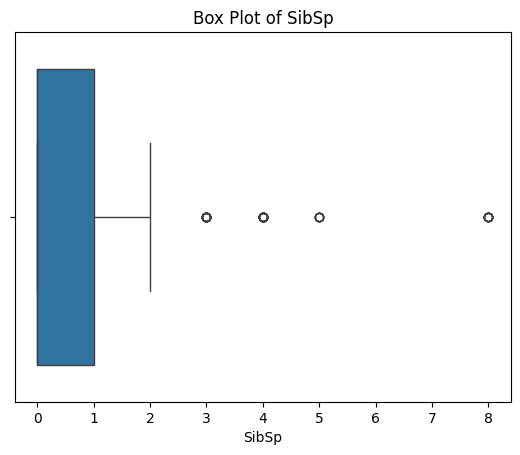

In [ ]:
sns.boxplot(data=df, x="SibSp")
plt.title("Box Plot of SibSp")

จาก Box plot พบว่าส่วนใหญ่ผู้โดยสารจะต้องจ่ายค่าโดยสารน้อยกว่า 50 ปอนด์ โดยค่าโดยสารที่มีราคาสูงตั้งแต่ประมาณ 75 ปอนด์ขึ้นไปจะอยู่ในกลุ่ม Outliers


Text(0.5, 1.0, 'Box Plot of Fare')

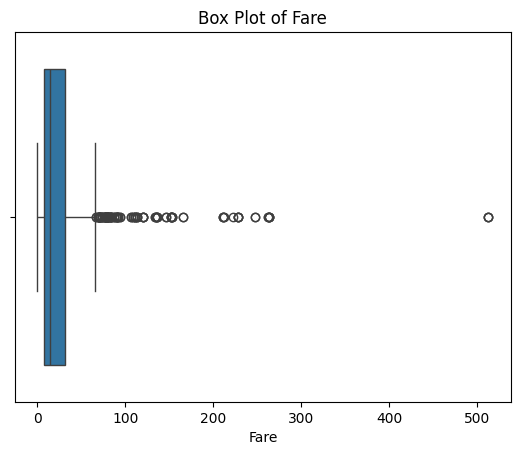

In [ ]:
sns.boxplot(data=df, x="Fare")
plt.title("Box Plot of Fare")

# Q5: การสํารวจความสัมพันธ์ระหว่างคอลัมน์ตัวเลข (Exploring Relationships between Numerical Columns)

a) คํานวณค่าสัมประสิทธิ์สหสัมพันธ์แบบเพียร์สัน (Pearson correlation coefficient) ระหว่างอายุ (Age) และค่าโดยสาร (Fare) แล้วอธิบายผลลัพธ์?

ค่าสัมประสิทธิ์สหสัมพันธ์แบบเพียร์สันเมื่อพิจารณาจะแบ่งออกได้เป็น 3 กรณี


1.   มีค่าเป็นศูนย์: ไม่มีความสัมพันธ์ใดๆ กันเลย
2.   มีค่าเป็นบวก: มีความสัมพันธ์ในเชิงบวก
3.   มีค่าเป็นลบ: มีความสัมพันธ์ในเชิงลบ

โดยค่าที่เป็นไปได้จะอยู่ในช่วง [-1,1] ยิ่งมีค่าเป็นบวกมากเท่าไรก็จะยิ่งมีความสัมพันธ์ในเชิงบวกมากเท่านั้น เช่นเดียวกันกับกรณีที่มีค่าเป็นลบ
<br><br>
จากค่าสัมประสิทธิ์สหสัมพันธ์ที่คำนวณได้คือ 0.09606669176903912 ซึ่งมีค่าใกล้เคียง 0 มาก จึงอาจสรุปได้ว่า Age และ Fare ไม่มีความสัมพันธ์กัน

In [ ]:
df[["Age", "Fare"]].corr(method="pearson").loc["Age", "Fare"]

0.09606669176903912

b) สร้างกราฟกระจาย (scatter plot) เพื่อแสดงความสัมพันธ์ระหว่างอายุ (Age) และค่าโดยสาร (Fare) คุณสังเกตเห็นรูปแบบใดบ้าง?

จาก Scatter plot จะสังเกตได้ว่าไม่ว่าในช่วงอายุใดก็จะมีการกระจายตัวของค่าโดยสารที่ค่อนข้างใกล้เคียงกัน ซึ่งก็ตรงกับข้อสรุปที่ได้ในข้อ a) ว่า Age และ Fare ไม่มีความสัมพันธ์กัน

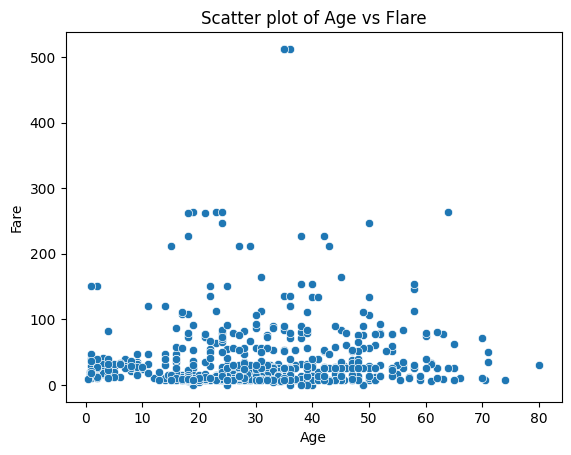

In [ ]:
sns.scatterplot(data=df, x="Age", y="Fare")
plt.title("Scatter plot of Age vs Flare")
plt.show()

c) สร้าง pairplot สําหรับอายุ (Age), ค่าโดยสาร (Fare), และจํานวนพี่น้อง/คู่สมรส (SibSp) คุณสามารถสรุปข้อมูลเชิงลึกอะไรจาก pairplot นี้บ้าง?

เมื่อลองพิจารณาความสัมพันธ์ระหว่าง Age-SibSp พบว่าผู้โดยสารที่มีอายุน้อยๆ จะมีพี่น้อง/คู่สมรสมากกว่าผู้โดยสารที่มีอายุเยอะ จัดว่าเป็นความสัมพันธ์ในเชิงลบ ส่วนความสัมพันธ์ระหว่าง Fare-SibSp ยังสังเกตรูปแบบความสัมพันธ์จาก Scatter plot ได้ไม่ชัดเจนนัก

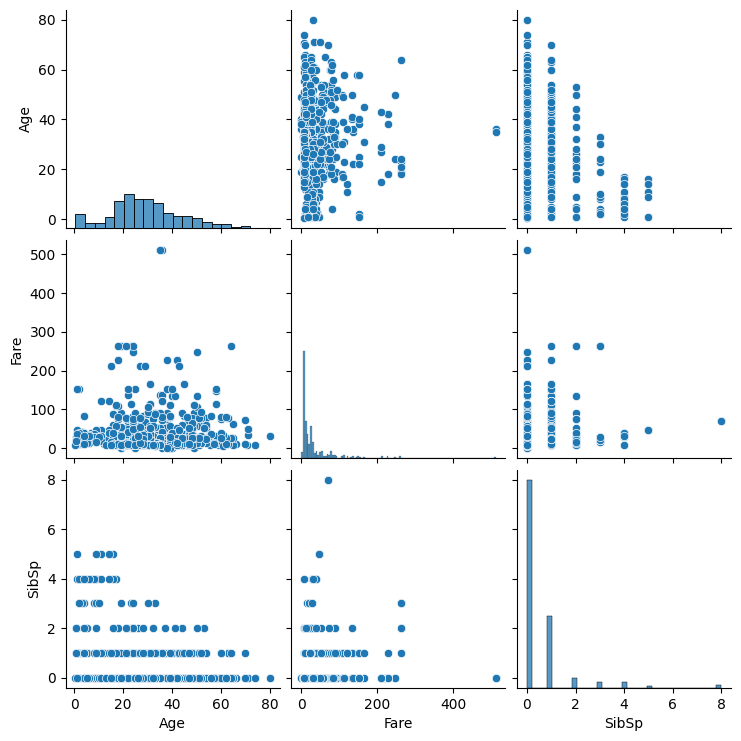

In [ ]:
sns.pairplot(df[["Age", "Fare", "SibSp"]])

# Q6: การสํารวจความสัมพันธ์ระหว่างคอลัมน์เชิงพรรณนา (Exploring Relationships between Categorical Columns)

a) สร้างตารางแจกแจง (contingency table) เพื่อแสดงการกระจายตัวของการรอดชีวิต (Survival) ในแต่ละประเภทชั้นโดยสาร (Pclass) ตารางนี้บอกอะไรเกี่ยวกับอัตราการรอดชีวิตในแต่ละชั้นโดยสารบ่าง?

จากตารางแจกแจง พบว่าผู้รอดชีวิตส่วนใหญ่มาจาก First class และผู้เสียชีวิตส่วนใหญ่มาจาก Third class

In [ ]:
contingency_table = pd.crosstab(df["Survived"], df["Pclass"])
contingency_table

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


<Axes: xlabel='Survived', ylabel='count'>

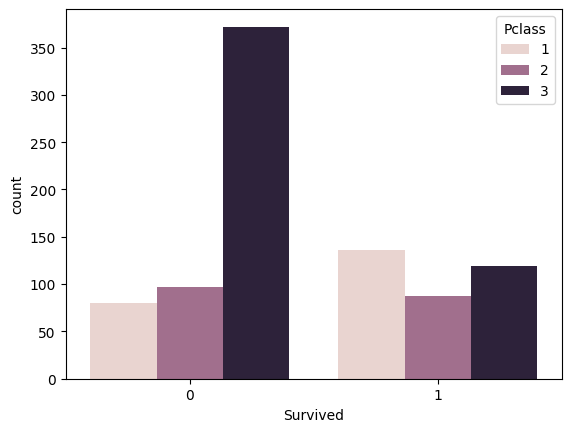

In [ ]:
sns.countplot(data=df, x="Survived", hue="Pclass")

b) ทําการทดสอบไคสแควร์ (Chi-Square Test of Independence) เพื่อหาว่ามีความสัมพันธ์อย่างมีนัยสําคัญระหว่างการรอดชีวิต (Survival) และชั้นโดยสาร (Pclass) หรือไม่ ผลลัพธ์ของการทดสอบเป็นอย่างไร?

กำหนดให้ Null hypothesis คือ Survived และ Pclass ไม่มีความสัมพันธ์กัน และ α=0.05 จากการทดสอบไคสแควร์ ได้ว่า p-value=4.549251711298793e-23 ซึ่งน้อยกว่า 0.05 จึงสรุปได้ว่าปฏิเสธ Null hypothesis ดังนั้น Survived และ Pclass มีความสัมพันธ์กัน

In [ ]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2: {chi2}, p-value: {p}, Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi2: 102.88898875696056, p-value: 4.549251711298793e-23, Degrees of Freedom: 2
Expected Frequencies:
[[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]
